SMS Spam Detection is the process of identifying and filtering unwanted or malicious text messages that are sent in bulk, often for advertising, fraud, or phishing purposes.

#Importance of SMS Spam Detection

Protects Users from Scams – Many spam messages contain phishing attempts, fraudulent links, or financial scams that can lead to data theft or monetary loss.

Enhances User Experience – Filtering out spam ensures that users receive only relevant and important messages, reducing unnecessary distractions.

# Objectives of SMS Spam Detection
Prevent Fraud and Phishing Attacks – Detect and block scam messages that attempt to steal personal or financial information.

Improve User Experience – Ensure that users receive only relevant and important messages, reducing distractions.

Enhance Mobile Security – Protect devices from malware or harmful links embedded in spam messages.

# Why Choose the SMS Spam Detection Project?

Enhancing User Security – By detecting spam, the project helps protect users from scams, malware, and financial fraud.

Real-World Problem – Spam messages are a growing issue, leading to fraud, phishing attacks, and security risks. This project provides a practical solution to combat these threats.

In [ ]:
# Importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the Dataset
df = pd.read_csv("/content/smsspamcollection.tsv",sep="\t")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
# Taken Random rows
df.sample(5)

,label,message,length,punct
3432,ham,Yeah if we do have to get a random dude we nee...,124,6
663,ham,Sorry me going home first... Daddy come fetch ...,56,6
2013,ham,Beautiful Truth against Gravity.. Read careful...,158,9
3990,ham,Ok lor. Anyway i thk we cant get tickets now c...,133,6
4923,ham,Hi Dear Call me its urgnt. I don't know whats ...,156,6


In [ ]:
# Find the top rows and columns in this data we have 5572 Rows and 4 Columns.
df.shape

(5572, 4)

*Data Cleaning

*EDA

*Text preprocessing

*Model Building

*Evaluation

*Improvment depending on evalution

# DATA CLEANING

In [ ]:
# Find the datatype of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [ ]:
# Describe the Columns.
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
# taken a new variable and drop length and punct columns
df1 = df.drop(columns=["length","punct"])

In [ ]:
# Then again find random rows from the dataset.
df1.sample(5)

,label,message
1264,ham,Ok. No wahala. Just remember that a friend in ...
4569,ham,hiya hows it going in sunny africa? hope u r a...
5345,ham,Wat ü doing now?
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...
2900,ham,"Aight, I should be there by 8 at the latest, p..."


In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transfrom the label columns into numeric form.
df1["label"] = encoder.fit_transform(df1["label"])

In [ ]:
# Find top 5 rows.
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Find the missing value
df1.isnull().mean()

,0
label,0.0
message,0.0


In [ ]:
# Check the duplicate value
df1.duplicated().sum()

403

In [ ]:
# Drop duplicate values from the dataset.
df1=df1.drop_duplicates(keep="first")

In [ ]:
# Check is there any duplicate value or not.
df1.duplicated().sum()

0

In [ ]:
# After remove the duplicate the rows and columns shape is decrease.Now, Rows are 5169 and columns 2
df1.shape

(5169, 2)

# EDA

In [ ]:
# Top 5 rows
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Then count the values in the Label column.
df1["label"].value_counts()

,count
label,
0,4516
1,653


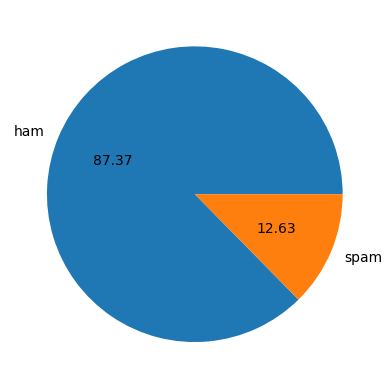

'labels = df1["label"].value_counts()\nplt.pie(labels,labels=["ham","spam"],autopct="%1.1f%%")\nplt.show()'

In [ ]:
# Now, I have made a pie chart to show the percentage of ham and spam in a label column.
plt.pie(df1["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

# Another code of this chart
"""labels = df1["label"].value_counts()
plt.pie(labels,labels=["ham","spam"],autopct="%1.1f%%")
plt.show()"""
# autopct = It calculates and displays the percentage of each pie slice based on its value relative to the total.

In [ ]:
# Data is Imbalance.

In [ ]:
import nltk

In [ ]:
# punct = !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
nltk.download("punct")

[nltk_data] Error loading punct: Package 'punct' not found in index


False

In [ ]:
# Find out the length of message column.
df1["message"].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [ ]:
# Add new column of character length
df1["num_characters"]=df["message"].apply(len)

In [ ]:
df1.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of words
nltk.download("punkt_tab")
df1["message"].apply(lambda x:nltk.word_tokenize(x))

# Word tokenization is the process of splitting a given text into individual words or tokens.
"""Example of Word Tokenization
Input:
"Hello, world! Welcome to NLP."
Output:
['Hello', ',', 'world', '!', 'Welcome', 'to', 'NLP', '.']"""

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'Example of Word Tokenization\nInput:\n"Hello, world! Welcome to NLP."\nOutput:\n[\'Hello\', \',\', \'world\', \'!\', \'Welcome\', \'to\', \'NLP\', \'.\']'

In [ ]:
df1["message"].apply(lambda x:len(nltk.word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [ ]:
# make a new columns with the name of num of words.
df1["num_of_words"]=df1["message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Sentence tokenization (or sentence segmentation) is the process of splitting a text into individual sentences.
"""Example of Sentence Tokenization
Input:
"Hello world! How are you? NLP is fun."

Output:
['Hello world!', 'How are you?', 'NLP is fun.']"""

df1["message"].apply(lambda x:nltk.sent_tokenize(x))

,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will ü b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [ ]:
# Make a new  column of num of sentences in message column
df1["num_of_sentences"]=df1["message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Then describe all three new columns.
df1[["num_characters","num_of_words","num_of_sentences"]].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# This is the describe of the "ham"
# Ham
df1[df1["label"]==0][["num_characters","num_of_words","num_of_sentences"]].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# and This is for Spam.
df1[df1["label"]==1][["num_characters","num_of_words","num_of_sentences"]].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
# No. of words in spam is usally greater than Ham.

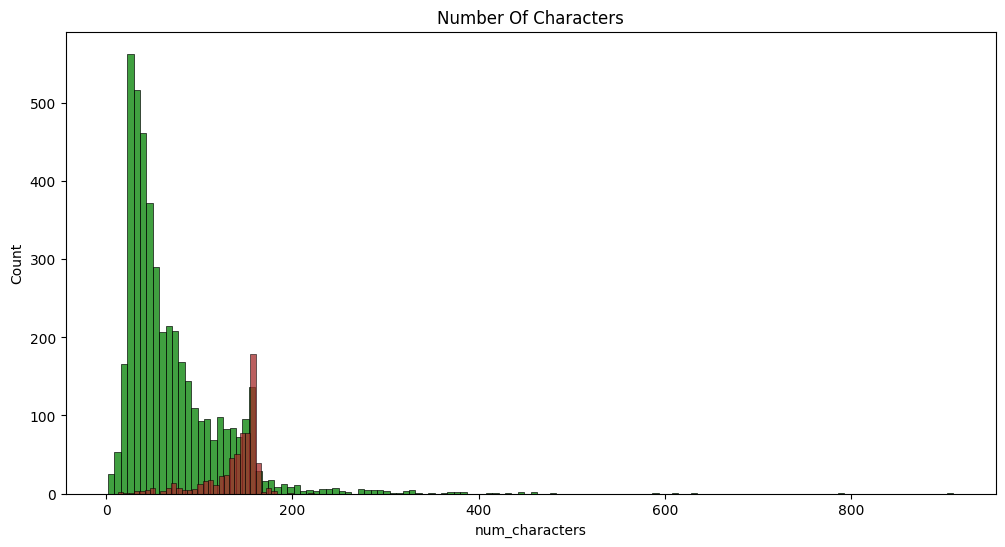

In [ ]:
# Make a histplot of num characters of ham and spam.
plt.figure(figsize=(12,6))
sns.histplot(df1[df1["label"]==0]["num_characters"],color="green")
sns.histplot(df1[df1["label"]==1]["num_characters"],color="brown")
plt.title("Number Of Characters")
plt.show()

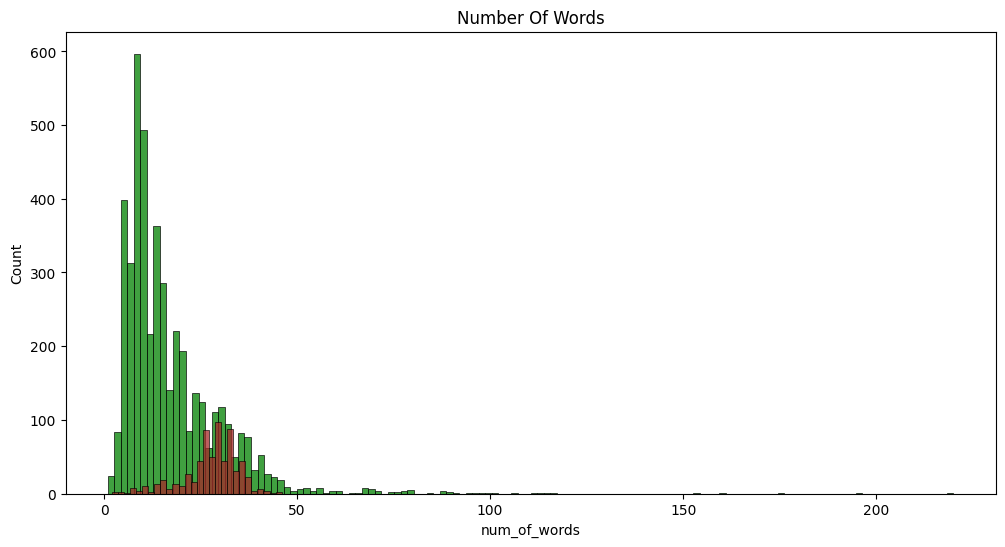

In [ ]:
# Histplot of num of words of ham and spam.
plt.figure(figsize=(12,6))
sns.histplot(df1[df1["label"]==0]["num_of_words"],color="green")
sns.histplot(df1[df1["label"]==1]["num_of_words"],color="brown")
plt.title("Number Of Words")
plt.show()

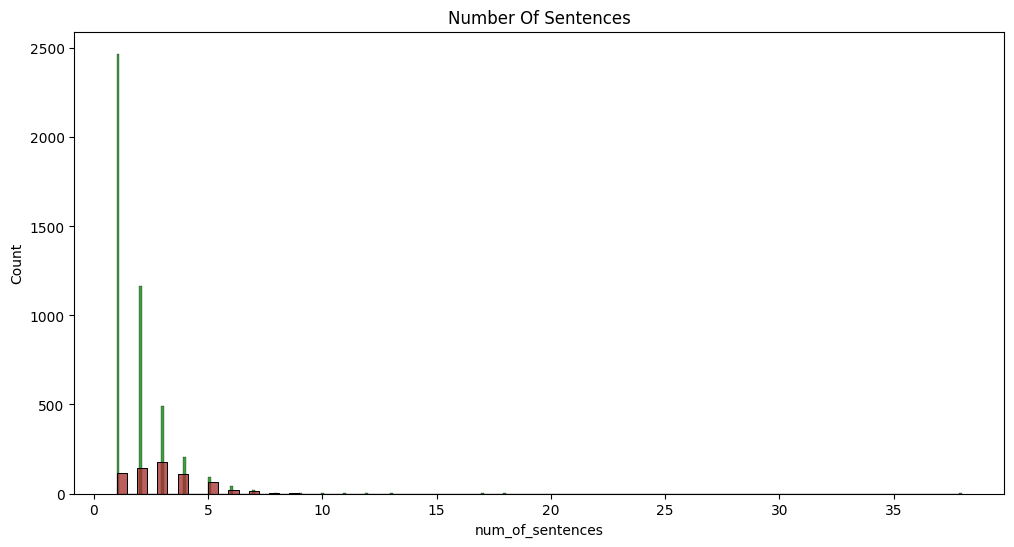

In [ ]:
# Histplot of num of sentences of ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df1[df1["label"]==0]["num_of_sentences"],color="green")
sns.histplot(df1[df1["label"]==1]["num_of_sentences"],color="brown")
plt.title("Number Of Sentences")
plt.show()

In [ ]:
# Make a new varibale of df2.
df2=df1.drop(columns=["message"])
df2

,label,num_characters,num_of_words,num_of_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [ ]:
# Find out the correlation of all the int columns.
df2.corr()

,label,num_characters,num_of_words,num_of_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characters,0.379777,1.000000,0.966002,0.622566
num_of_words,0.260168,0.966002,1.000000,0.679142
num_of_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

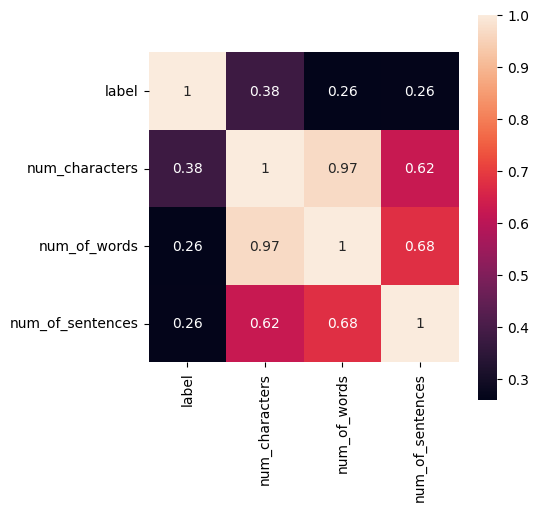

In [ ]:
# Make a heatmap.
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(),annot=True,square=True)

In [ ]:
# Again find the shape of dataset now, we have 5169 rows and 5 columns
df1.shape

(5169, 5)

# DATA PREPROCESSING

In [ ]:
# Lower Case
# Tokenization
# Remove Special Characters
# Removing Stop Words and Punctuations
# Stemming

In [ ]:
# Corpus = A corpus is a large collection of written or spoken texts compiled to study and analyze language use.

from nltk.corpus import stopwords

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [ ]:
# This is the work of preprocessing of text by nlp
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')
df1["message"].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
df1["transformed_message"] = df1["message"].apply(transform_text)

In [ ]:
# This is the after cleaning of text. i have created new column of treanformed message.
df1.head()

,label,message,num_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Word Cloud for ham

! pip install wordcloud

In [ ]:
# Import the wordcloud library.
from wordcloud import WordCloud

In [ ]:
# Make a background of wordcloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Then give the spam data to wordcloud
spam_wc = wc.generate(df1[df1['label']==1]['transformed_message'].str.cat(sep=" "))

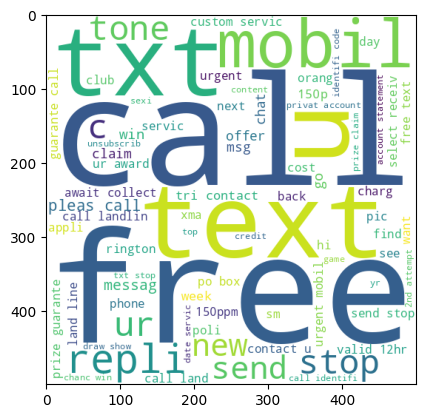

In [ ]:
# Then show the chart
plt.imshow(spam_wc)

In [ ]:
# Then give ham data for make a wordcloud
ham_wc = wc.generate(df1[df1["label"]==0]["transformed_message"].str.cat(sep=""))

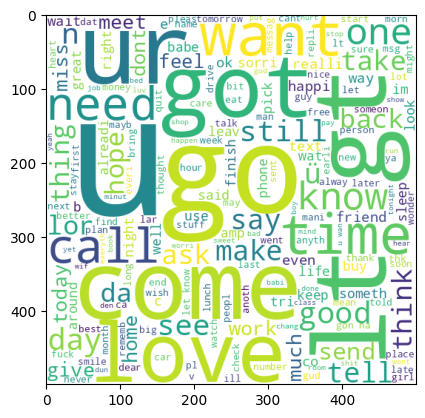

In [ ]:
# It is the chart of ham
plt.imshow(ham_wc)

In [ ]:
# Show the full dataset.
df1[df1["label"]==1]["transformed_message"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [ ]:
spam_corpus = []
for msg in df1[df1["label"]==1]["transformed_message"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9982

In [ ]:
# This is the count of spam words
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 61,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
# Adding in dataframe
from collections import Counter
df3 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df3

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [ ]:
# Rename the columns name.
df3 = df3.rename(columns={0:"word",1:"count"})
df3

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


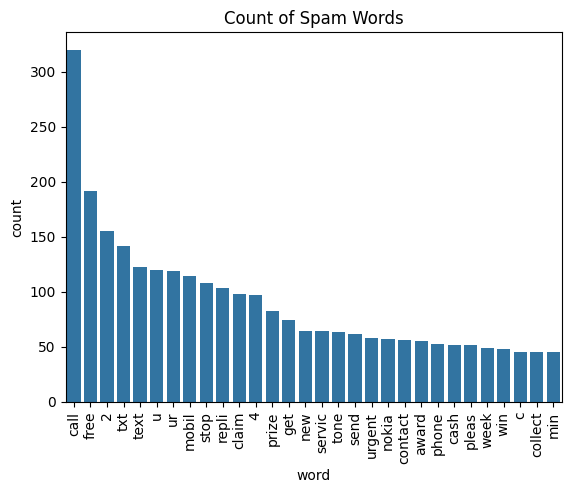

In [ ]:
# Make a bar chart of word and there count.
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="word",y="count",data=df3)
plt.xticks(rotation="vertical")
plt.title("Count of Spam Words")
plt.show()

In [ ]:
# Now same work with ham.
ham_corpus = []
for msg in df1[df1["label"]==0]["transformed_message"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35939

In [ ]:
# Count of ham words
from collections import Counter
Counter(ham_corpus)

Counter({'go': 407,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 121,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 239,
         'amor': 1,
         'wat': 108,
         'ok': 218,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 897,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 58,
         'alreadi': 90,
         'nah': 10,
         'think': 150,
         'goe': 26,
         'usf': 11,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 78,
         'brother': 18,
         'like': 236,
         'speak': 25,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [ ]:
# Then enter both columns in a dataframe and rename the columns name
from collections import Counter
df3 = pd.DataFrame(Counter(ham_corpus).most_common(30))
df3 = df3.rename(columns={0:"ham_word",1:"count"})
df3

,ham_word,count
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


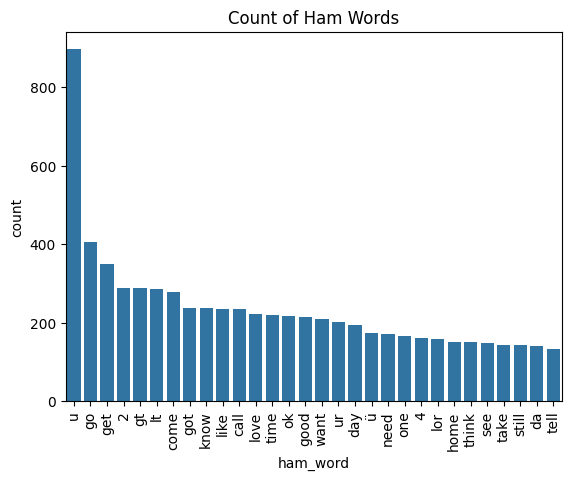

In [ ]:
# Make a bar chart of ham words with there count.
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="ham_word",y="count",data=df3)
plt.xticks(rotation="vertical")
plt.title("Count of Ham Words")
plt.show()

# MODEL BUILDING

In [ ]:
# Show top 5 rows of the dataset
df1.head()

,label,message,num_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Import the model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
# Then convert transformed message column in a numeric form
x = cv.fit_transform(df1["transformed_message"]).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5169, 6782)

In [ ]:
y = df1["label"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(df1["transformed_message"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5169, 6782)

In [ ]:
# Train - test splitting
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
df3.head()

,ham_word,count
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288


In [ ]:
# Top 5 rows from the dataset
df1.head()

,label,message,num_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Use Logistic Regression for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('/content/smsspamcollection.tsv', sep='\t')

# Features and target
X = df['message']  # Input feature: Text messages
y = df['label']    # Target: Labels (0 or 1)

# ----> Convert 'label' column to numerical using Label Encoding <----
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to numerical vectors
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Model 1: Logistic Regression -----
# Note: Logistic Regression is more suitable for classification compared to Linear Regression
logistic_regressor = LogisticRegression()  # Create a Logistic Regression model
logistic_regressor.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_lr = logistic_regressor.predict(X_test)  # Predict on test data

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# ----- Model 2: Random Forest -----
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ----- Model 3: Decision Tree -----
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict using Decision Tree
y_pred_dt = decision_tree.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Random Forest Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Decision Tree Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/smsspamcollection.tsv', sep='\t')

# Features and target
X = df['message']
y = df['label']

# Convert 'label' column to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocess the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----> Model Training and Evaluation <----

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)  # Add confusion matrix

    # Store results
    results.append([model_name, accuracy, precision, recall, f1, conf_matrix])

# ----> Display Results <----

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Print the results
print(results_df)

# Optionally, you can further analyze the confusion matrices for each model.

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression   0.97130   1.000000  0.785235  0.879699   
1        Random Forest   0.98296   1.000000  0.872483  0.931900   
2        Decision Tree   0.97130   0.909091  0.872483  0.890411   

         Confusion Matrix  
0   [[966, 0], [32, 117]]  
1   [[966, 0], [19, 130]]  
2  [[953, 13], [19, 130]]  


In [ ]:
# conclusion
# The Random Forest model has high accuracy of comparision of logistic regression and Decision Tress.

In [ ]:
# Thankyou